4.10 Coding Etiquette & Excel Reporting

1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/hakangurler/Desktop/Original data'

In [3]:
df = pd.read_pickle(os.path.join(path, 'final_instacart_data.pkl'))

2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [4]:
df.shape

(32434212, 29)

In [6]:
df.dtypes

order_id                            int64
user_id                             int64
order_number                        int64
orders_day_of_week                  int64
order_hour_of_day                   int64
days_since_prior_order            float64
product_id                        float64
add_to_cart_order                 float64
reordered                         float64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
_merge                           category
max_order                           int64
loyalty_flag                       object
avg_price                         float64
spender_flag                       object
median_days_since_prior_order     float64
frequency_flag                     object
first_name                         object
surname                            object
gender                             object
state                             

In [7]:
# Delete any duplicate/unnecessary columns

final_df = df.drop(columns = ['_merge'])

In [8]:
# Remove First and Last Name due to security

final_df = df.drop(columns = ['first_name', 'surname'])

In [9]:
final_df.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spender_flag,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,999.0,196.0,1.0,0.0,Soda,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
5,3367565,1,6,2,7,19.0,196.0,1.0,1.0,Soda,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
6,550135,1,7,1,9,20.0,196.0,1.0,1.0,Soda,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
7,3108588,1,8,1,14,14.0,196.0,2.0,1.0,Soda,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
8,2295261,1,9,1,16,0.0,196.0,4.0,1.0,Soda,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362,1,10,4,8,30.0,196.0,1.0,1.0,Soda,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [10]:
# Check dataframe dimension

final_df.shape

(32434212, 27)

In [13]:
# Check frequency for state column

final_df['state'].value_counts(dropna = False)

Pennsylvania            667710
California              660447
Rhode Island            657655
Georgia                 657072
New Mexico              655143
Arizona                 654545
North Carolina          652338
Oklahoma                652263
Alaska                  649020
Minnesota               648408
Massachusetts           647000
Wyoming                 644929
Virginia                642075
Missouri                641313
Texas                   641058
Colorado                639752
Maine                   639149
North Dakota            638999
Alabama                 638617
Louisiana               638174
Kansas                  637991
Delaware                637447
South Carolina          637348
Oregon                  636949
Arkansas                636706
Nevada                  636697
New York                636697
Montana                 635835
South Dakota            634340
Illinois                633490
Hawaii                  633445
Washington              633421
Mississi

In [14]:
# Defining Regions

regionNE = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

In [15]:
regionSE = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia', 'District of Columbia'] 

In [16]:
regionMW = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Ohio', 'North Dakota', 'Nebraska', 'South Dakota', 'Wisconsin']

In [17]:
regionSW = ['Arizona', 'New Mexico', 'Oklahoma', 'Texas']

In [18]:
regionW = ['Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Nevada', 'Montana', 'Oregon', 'Utah', 'Washington', 'Wyoming']

In [20]:
# Create if-state with the loc function

final_df.loc[df['state'].isin (regionNE), 'region'] = 'Northeast'

In [21]:
final_df.loc[df['state'].isin (regionSE), 'region'] = 'Southeast'

In [22]:
final_df.loc[df['state'].isin (regionMW), 'region'] = 'Midwest'

In [23]:
final_df.loc[df['state'].isin (regionSW), 'region'] = 'Southwest'

In [24]:
final_df.loc[df['state'].isin (regionW), 'region'] = 'West'

In [25]:
# Check frequency

final_df['region'].value_counts(dropna = False)

Southeast    9508289
Midwest      7603810
West         6990757
Northeast    5728347
Southwest    2603009
Name: region, dtype: int64

In [27]:
# Check region
final_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,region
0,2539329,1,1,2,8,999.0,196.0,1.0,0.0,Soda,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast


In [28]:
#Determine whether there's a difference in spending habits between the different U.S regions

crosstab = pd.crosstab(final_df['region'], final_df['spender_flag'], dropna = False)

In [29]:
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,156100,7447710
Northeast,108336,5620011
Southeast,185241,9323048
Southwest,50733,2552276
West,134923,6855834


There is a difference in spending habits between the different U.S regions.

4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample

In [30]:
final_df.dtypes

order_id                            int64
user_id                             int64
order_number                        int64
orders_day_of_week                  int64
order_hour_of_day                   int64
days_since_prior_order            float64
product_id                        float64
add_to_cart_order                 float64
reordered                         float64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
_merge                           category
max_order                           int64
loyalty_flag                       object
avg_price                         float64
spender_flag                       object
median_days_since_prior_order     float64
frequency_flag                     object
gender                             object
state                              object
age                                 int64
date_joined                       

In [31]:
#Derive exclusion flag

final_df.loc[df['max_order'] < 5, 'exclusion flag'] = 'low-activity'
final_df.loc[df['max_order'] >= 5, 'exclusion flag'] = 'high-activity'

In [32]:
final_df['exclusion flag'].value_counts(dropna = False)

high-activity    30992664
low-activity      1441548
Name: exclusion flag, dtype: int64

In [33]:
final_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,region,exclusion flag
0,2539329,1,1,2,8,999.0,196.0,1.0,0.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Southeast,high-activity


In [34]:
# Dropping low activity from dataframe

df_2 = final_df.drop(final_df[final_df.max_order < 5].index)

In [35]:
df_2.shape

(30992664, 29)

In [36]:
df_2.to_pickle(os.path.join(path, 'df_high_activity.pkl'))

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [37]:
final_df['age'].describe()

count    3.243421e+07
mean     4.946521e+01
std      1.848553e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

The minimum age group is 18 and the max age group is 81 with the mean being 49. Will group with generation label
A) Gen Z: 18-26
B) Millennials: 27-42
C) Gen X: 43-58
D) Boomers II: 59-68
E) Boomers I: 69-77
F) Post War: 78-81

In [38]:
# Create age_flag

final_df.loc[final_df['age'] <= 26, 'age_flag'] = 'Gen Z'

In [41]:
final_df.loc[(final_df['age'] <= 42) & (final_df['age'] >= 27), 'age_flag'] = 'Millennials'

In [42]:
final_df.loc[(final_df['age'] <= 58) & (final_df['age'] >= 43), 'age_flag'] = 'Gen X'

In [43]:
final_df.loc[(final_df['age'] <= 68) & (final_df['age'] >= 59), 'age_flag'] = 'Boomers II'

In [44]:
final_df.loc[(final_df['age'] <= 77) & (final_df['age'] >= 69), 'age_flag'] = 'Boomers I'

In [45]:
final_df.loc[final_df['age'] >= 78, 'age_flag'] = 'Post War'

In [46]:
# Check value counts

final_df['age_flag'].value_counts(dropna = False)

Gen X          8190812
Millennials    8101009
Boomers II     4981197
Gen Z          4562293
Boomers I      4547516
Post War       2051385
Name: age_flag, dtype: int64

In [47]:
final_df['income'].describe()

count    3.243421e+07
mean     9.943525e+04
std      4.305473e+04
min      2.590300e+04
25%      6.699800e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

The minimum income is 25,900 meanwhile the maximum is 593,000. Will group the income by the following groups:
   A) Low: 32,048 or less
   B) Lower Middle: 32,049 - 53,413
   C) Middle Class: 53,414 - 106,827
   D) Upper-Middle Class: 106,828 - 373,894
   E) Wealthy: 373,895 and up

In [48]:
# Create income_flag
final_df.loc[final_df['income'] <= 32048, 'income_flag'] = 'Low Class'

In [49]:
final_df.loc[(final_df['income'] >= 32049) & (final_df['income'] <= 53413), 'income_flag'] = 'Lower Middle Class'

In [50]:
final_df.loc[(final_df['income'] >= 53414) & (final_df['income'] <= 106827), 'income_flag'] = 'Middle Class'

In [51]:
final_df.loc[(final_df['income'] >= 106828) & (final_df['income'] <= 373894 ), 'income_flag'] = 'Upper-Middle Class'

In [52]:
final_df.loc[final_df['income'] >= 373895, 'income_flag'] = 'Wealthy Class'

In [53]:
# Check frequency for income_flag

final_df['income_flag'].value_counts(dropna = False)

Middle Class          15260213
Upper-Middle Class    12822571
Lower Middle Class     3768182
Low Class               524247
Wealthy Class            58999
Name: income_flag, dtype: int64

In [54]:
# Check department_id values

final_df['department_id'].value_counts(dropna = False)

4     9479291
16    5414016
19    2887550
7     2688159
1     2236432
13    1875577
3     1176787
15    1068058
20    1051249
9      866627
17     738666
14     710647
12     708931
11     447691
18     423802
6      269253
5      153743
8       97724
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [55]:
df_dept = pd.read_csv(os.path.join(path, 'departments_wrangled.csv'))

In [56]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [57]:
#Rename column Unnamed: 0 to department_id

df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [58]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [59]:
# Combine data sets 

df_merge = final_df.merge(df_dept, on = 'department_id')

In [60]:
df_merge.shape

(32434212, 32)

In [62]:
df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,no_of_dependants,marital_status,income,region,exclusion flag,age_flag,income_flag,department
0,2539329,1,1,2,8,999.0,196.0,1.0,0.0,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,31,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages


In [63]:
df_merge['department'].value_counts(dropna = False)

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           710647
meat seafood        708931
personal care       447691
babies              423802
international       269253
alcohol             153743
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [64]:
# Create a data dictionary

dept = zip(df_merge['department_id'], df_merge['department'])

In [65]:
depts_dict = dict(dept)

In [66]:
depts_dict

{7: 'beverages',
 16: 'dairy eggs',
 19: 'snacks',
 17: 'household',
 4: 'produce',
 14: 'breakfast',
 13: 'pantry',
 3: 'bakery',
 1: 'frozen',
 9: 'dry goods pasta',
 15: 'canned goods',
 11: 'personal care',
 12: 'meat seafood',
 20: 'deli',
 6: 'international',
 5: 'alcohol',
 21: 'missing',
 8: 'pets',
 18: 'babies',
 2: 'other',
 10: 'bulk'}

In [67]:
df_merge.shape

(32434212, 32)

In [69]:
df_merge.dtypes

order_id                            int64
user_id                             int64
order_number                        int64
orders_day_of_week                  int64
order_hour_of_day                   int64
days_since_prior_order            float64
product_id                        float64
add_to_cart_order                 float64
reordered                         float64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
_merge                           category
max_order                           int64
loyalty_flag                       object
avg_price                         float64
spender_flag                       object
median_days_since_prior_order     float64
frequency_flag                     object
gender                             object
state                              object
age                                 int64
date_joined                       

In [70]:
df_merge['no_of_dependants'].value_counts(dropna = False)

3    8142318
0    8105197
2    8098387
1    8088310
Name: no_of_dependants, dtype: int64

The dependants range from 0-3 dependants. I will range as follows
A) Single Adult: 0 dependants
B) Family with baby: if their order falls under department of id 18 'babies'
C) Family: 1-3 dependants and if their order does not include id 18 'babies'

In [72]:
# Create a flag for family_status

df_merge.loc[df_merge['no_of_dependants'] <= 0, 'family_flag'] = 'single adult'

In [73]:
df_merge.loc[(df_merge['department_id'] == 18) & (df_merge['no_of_dependants'] > 0), 'family_flag'] = 'family with baby'

In [74]:
df_merge.loc[(df_merge['department_id'] !=18) & (df_merge['no_of_dependants'] > 0), 'family_flag'] = 'family'

In [75]:
df_merge['family_flag'].value_counts(dropna = False)

family              24011707
single adult         8105197
family with baby      317308
Name: family_flag, dtype: int64

In [76]:
df_merge.head(
)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,no_of_dependants,marital_status,income,region,exclusion flag,age_flag,income_flag,department,family_flag
0,2539329,1,1,2,8,999.0,196.0,1.0,0.0,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family


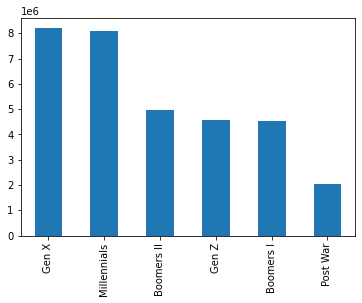

In [109]:
# Create bar chart for age_flag 

bar = df_merge['age_flag'].value_counts().plot.bar()

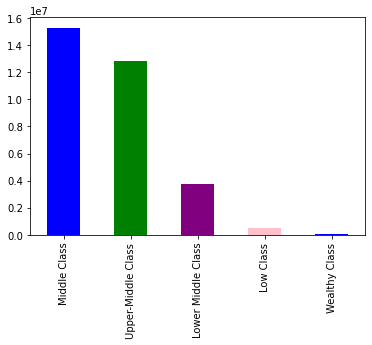

In [110]:
# Create bar chart for income_flag

bar_1 = df_merge['income_flag'].value_counts().plot.bar(color = ['blue', 'green', 'purple', 'pink'])

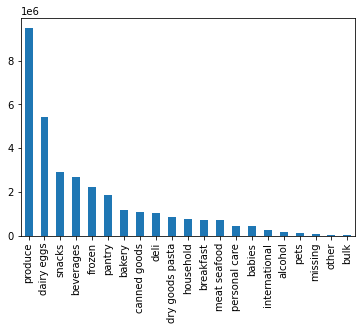

In [111]:
# create chart for deparment

bar_2 = df_merge['department'].value_counts().plot.bar()

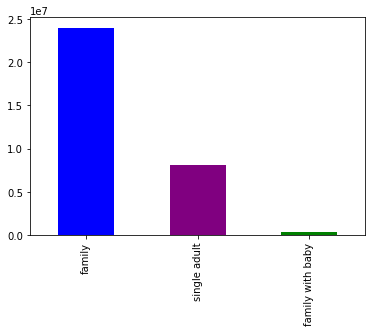

In [112]:
bar_3 = df_merge['family_flag'].value_counts().plot.bar(color = ['blue', 'purple', 'green'])

In [113]:
bar.figure.savefig(os.path.join(path, 'bar_age_flag.png'))

In [114]:
bar_1.figure.savefig(os.path.join(path, 'bar_income_flag.png'))

In [115]:
bar_2.figure.savefig(os.path.join(path, 'bar_department.png'))

In [116]:
bar_3.figure.savefig(os.path.join(path, 'bar_family_flag.png'))

In [81]:
df_merge['frequency_flag'].value_counts(dropna = False)

Frequent customer        20533767
Regular customer          7275860
Non-frequent customer     4624585
Name: frequency_flag, dtype: int64

In [82]:
df_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'max_order', 'loyalty_flag',
       'avg_price', 'spender_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'marital_status', 'income', 'region',
       'exclusion flag', 'age_flag', 'income_flag', 'department',
       'family_flag'],
      dtype='object')

In [83]:
df_merge.shape

(32434212, 33)

In [84]:
# create days column with name for customer-profile

df_merge.loc[df_merge['orders_day_of_week'] == 0, 'day_of_week'] = 'saturday'

In [85]:
df_merge.loc[df_merge['orders_day_of_week'] == 1, 'day_of_week'] = 'sunday'

In [86]:
df_merge.loc[df_merge['orders_day_of_week'] == 2, 'day_of_week'] = 'monday'

In [87]:
df_merge.loc[df_merge['orders_day_of_week'] == 3, 'day_of_week'] = 'tuesday'

In [88]:
df_merge.loc[df_merge['orders_day_of_week'] == 4, 'day_of_week'] = 'wednesday'

In [89]:
df_merge.loc[df_merge['orders_day_of_week'] == 5, 'day_of_week'] = 'thursday'

In [90]:
df_merge.loc[df_merge['orders_day_of_week'] == 6, 'day_of_week'] = 'friday'

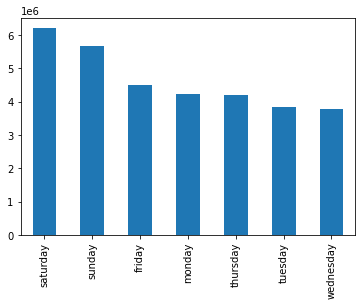

In [117]:
# Review which days of weeks are busiest per value counts

bar_4 = df_merge['day_of_week'].value_counts().plot.bar()

In [118]:
bar_4.figure.savefig(os.path.join(path, 'bar_day_of_week.png'))

In [92]:
# Age Profile Usage Frequency Aggregation

df_merge.groupby('age_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order            
                              mean  min    max
age_flag                                      
Boomers I                74.424359  0.0  999.0
Boomers II               75.031807  0.0  999.0
Gen X                    74.088557  0.0  999.0
Gen Z                    74.511760  0.0  999.0
Millennials              74.377567  0.0  999.0
Post War                 73.885607  0.0  999.0

In [93]:
# Income Profile Usage Frequency Aggregation

df_merge.groupby('income_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order            
                                     mean  min    max
income_flag                                          
Low Class                       85.198632  0.0  999.0
Lower Middle Class              82.030670  0.0  999.0
Middle Class                    73.289871  0.0  999.0
Upper-Middle Class              73.100961  0.0  999.0
Wealthy Class                   60.209936  0.0  999.0

In [94]:
# Family Status Profile Usage Frequency Aggregration

df_merge.groupby('family_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order            
                                   mean  min    max
family_flag                                        
family                        74.593649  0.0  999.0
family with baby              62.235377  0.0  999.0
single adult                  74.300060  0.0  999.0

In [95]:
# Age Profile Expenditure Frequency Aggregation

df_merge.groupby('age_flag').agg({'prices':['mean', 'min', 'max']})

prices              
                  mean  min      max
age_flag                            
Boomers I    12.130758  1.0  99999.0
Boomers II   11.592595  1.0  99999.0
Gen X        12.295916  1.0  99999.0
Gen Z        12.124882  1.0  99999.0
Millennials  11.896287  1.0  99999.0
Post War     11.351557  1.0  99999.0

In [96]:
# Income Profile Expenditure Frequency Aggregation

df_merge.groupby('income_flag').agg({'prices':['mean', 'min', 'max']})

prices              
                          mean  min      max
income_flag                                 
Low Class             6.504946  1.0     25.0
Lower Middle Class    6.875360  1.0     25.0
Middle Class          8.710461  1.0  99999.0
Upper-Middle Class   16.474715  1.0  99999.0
Wealthy Class       256.096852  1.0  99999.0

In [104]:
# Region Status Profile Usage Frequency Aggregration

df_merge.groupby('region').agg({'prices':['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.715745  1.0  99999.0
Northeast  11.556398  1.0  99999.0
Southeast  12.349660  1.0  99999.0
Southwest  11.543990  1.0  99999.0
West       11.191714  1.0  99999.0

In [106]:
# Gender Status Profile Expenditure Frequency Aggregration

df_merge.groupby('gender').agg({'prices':['mean', 'min', 'max']})

prices              
             mean  min      max
gender                         
Female  11.893068  1.0  99999.0
Male    12.068006  1.0  99999.0

In [97]:
pd.crosstab(df_merge['age_flag'], df_merge['region'], dropna = False)

region,Midwest,Northeast,Southeast,Southwest,West
age_flag,,,,,
Boomers I,1049610,811299,1329320,345385,1011902
Boomers II,1162457,896931,1467165,390621,1064023
Gen X,1957070,1447575,2353363,662852,1769952
Gen Z,1051295,799716,1368945,371964,970373
Millennials,1906458,1410005,2388392,650892,1745262
Post War,476920,362821,601104,181295,429245


In [98]:
pd.crosstab(df_merge['income_flag'], df_merge['region'], dropna = False)

region,Midwest,Northeast,Southeast,Southwest,West
income_flag,,,,,
Low Class,125655,85866,161336,46131,105259
Lower Middle Class,875523,678667,1110566,301383,802043
Middle Class,3532474,2672444,4505551,1211545,3338199
Upper-Middle Class,3050597,2281589,3718377,1040364,2731644
Wealthy Class,19561,9781,12459,3586,13612


In [99]:
pd.crosstab(df_merge['family_flag'], df_merge['region'], dropna = False)

region,Midwest,Northeast,Southeast,Southwest,West
family_flag,,,,,
family,5623259,4252025,7052202,1882583,5201638
family with baby,73594,56621,93046,26181,67866
single adult,1906957,1419701,2363041,694245,1721253


In [100]:
pd.crosstab(df_merge['gender'], df_merge['region'], dropna = False)

region,Midwest,Northeast,Southeast,Southwest,West
gender,,,,,
Female,3809868,2766452,4739876,1286990,3501403
Male,3793942,2961895,4768413,1316019,3489354


In [101]:
pd.crosstab(df_merge['age_flag'], df_merge['department'], dropna = False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_flag,,,,,,,,,,,,,,,,,,,,,
Boomers I,21385,58915,164804,382954,99029,4755,147675,764624,147439,120847,...,104746,37171,99535,9535,4841,262665,62021,13533,1324441,402860
Boomers II,22921,63990,180388,414337,107958,5235,165013,825319,162919,133162,...,113160,41142,109521,10675,5742,290699,69329,15057,1458115,440301
Gen X,38925,109160,298359,682418,180459,8670,269141,1362091,264031,219337,...,186452,67758,178648,17355,9224,474738,114422,24643,2387537,731110
Gen Z,23050,60810,165995,375528,101693,4964,150872,764709,147714,123061,...,102915,38403,99758,10133,5271,263743,62884,14775,1326518,405955
Millennials,38385,105065,293256,663085,176656,8656,267674,1359313,263283,215440,...,184227,67710,175351,17154,8999,465617,111058,23393,2378835,723638
Post War,9077,25862,73985,169837,44852,2293,67683,337960,65863,54780,...,47166,17069,46118,4293,2214,118115,27977,6323,603845,183686


In [102]:
pd.crosstab(df_merge['income_flag'], df_merge['department'], dropna = False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_flag,,,,,,,,,,,,,,,,,,,,,
Low Class,2878,3683,16609,61761,14412,764,12055,75897,17200,9850,...,13785,3533,4183,1033,690,25055,7304,1194,124709,93485
Lower Middle Class,19737,35918,123707,406019,100094,4914,95896,572666,119351,78705,...,95978,25289,45453,7759,4212,192525,54032,10259,954103,575049
Middle Class,66731,211287,558139,1200463,323362,16382,516651,2580513,496668,421020,...,335047,131519,353894,33173,16951,892327,209485,45568,4573227,1222115
Upper-Middle Class,62526,172451,475708,1014298,271438,12509,441255,2174992,416444,355261,...,290961,108388,303996,27119,14331,761979,175972,40223,3815296,991567
Wealthy Class,1871,463,2624,5618,1341,4,2201,9948,1586,1791,...,2895,524,1405,61,107,3691,898,480,11956,5334


In [103]:
pd.crosstab(df_merge['family_flag'], df_merge['department'], dropna = False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
family_flag,,,,,,,,,,,,,,,,,,,,,
family,114600,0,881249,2013709,534090,26295,803220,4060628,786104,651365,...,557893,201540,534846,52057,27116,1408755,335653,73141,7103846,2166752
family with baby,0,317308,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
single adult,39143,106494,295538,674450,176557,8278,264838,1353388,265145,215262,...,180773,67713,174085,17088,9175,466822,112038,24583,2375445,720798
